# Purpose: 
In labs 4.1 - 4.3, you will learn how to:

- create a scatter plot
- generate outputs for correlations and regressions
- compute p-values for chi-square tests.
- learn how to do hypothesis testing
- how to report the results as seen in research articles.

In [12]:
# This cell sets things up; please don't change it.

# Import stuff we need
import numpy as np
from datascience import *
from scipy.stats import pearsonr

# These lines do some fancy plotting magic:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Scenario: Correlation and Simple Regression

Suppose a researcher is studying the relationship of sleep to mood. As an initial test, the researcher asks six students in her morning seminar two questions:
1. How many hours did you sleep last night?
2. How happy do you feel right now on a scale from 0 = not at all happy to
8 = extremely happy?

*Note: Since the researcher asked students how many hours they slept and what their mood is after sleeping, it is most likely the case that the researcher believes that depending on how many hours student slept will predict their mood. This will be important for when we conduct a regression. Create a scatter plot.

**Question 0:** Read in the sleep data by using the `Table().read_table()` method. Inside this method, paste the following name: sleep_data.csv

In [13]:
# Read in the data. This is like opening a CSV file in Excel.
sleep_tbl = Table().read_table("sleep_data.csv")

# Show all the rows in this dataset.
sleep_tbl.show()

Participants,Sleep,Mood
1,5,2
2,7,4
3,8,7
4,6,2
5,6,3
6,10,6


## Scatter Plot
A scatter plot is a fundamental type of chart that shows the relationship between two different variables.

The code below uses the `sleep_tbl` data table and applies the `.scatter()` function. This command is designed to draw a plot, where:

- The first column name listed ('Sleep') becomes the horizontal axis (x-axis).

- The second column name listed ('Mood') becomes the vertical axis (y-axis).

The resulting plot will show one dot for every row in our data table, allowing us to see if people who got more sleep tended to report a higher mood score.

**Question 1:** Fill in the blanks inside the `scatter()` function. Hint: what are the names of columns in our dataset?

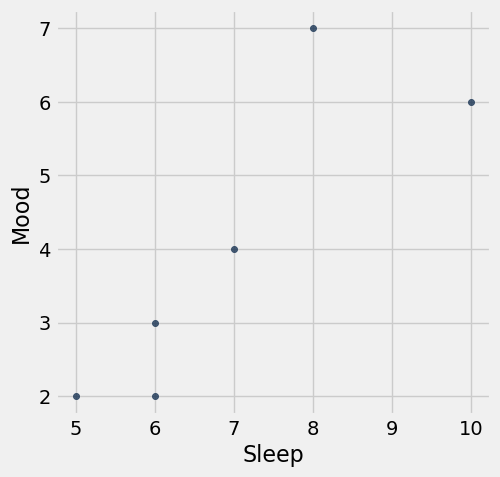

In [14]:
sleep_tbl.scatter('Sleep', 'Mood')

## Correlation Matrix
A Correlation Matrix is simply a table that shows how strongly different variables are related to each other.

- The numbers in the table are called correlation coefficients, which always fall between -1 and 1.
- A number close to 1 (like 0.9) means the variables are strongly related and move in the same direction (e.g., as crab length increases, weight increases).
- A number close to -1 (like -0.8) means they move in opposite directions.
- A number close to 0 means there is no linear relationship.

`np.corrcoef` calculates a value between -1 and 1 for each pair of variables you give it. This value is the **correlation coefficient**. It tells you the strength of the correlation.

You give `np.corrcoef` one or more one-dimensional arrays (lists of numbers), like this: `np.corrcoef(array1, array2)`

**Question 2.1:** Define two variables -- `sleep` and `mood` -- which hold the Sleep and Mood columns.

In [24]:
# First, get the data columns as arrays.
# This is like clicking the letter at the top of a column (e.g., Column B) to select all the data in it.
sleep = sleep_tbl.column('Sleep')
mood = sleep_tbl.column('Mood')

# Show the variables
print("Sleep Data (X):", sleep)
print("Mood Data (Y):", mood)

Sleep Data (X): [ 5  7  8  6  6 10]
Mood Data (Y): [2 4 7 2 3 6]


**Question 2.2:** Generate the correlation matrix using `np.corrcoef`.

In [16]:
# Now, use np.corrcoef using the arrays you just defined
corr_matrix = np.corrcoef(sleep, mood)

# Print, aka show, the matrix
print(corr_matrix)

[[ 1.          0.85280287]
 [ 0.85280287  1.        ]]


Notice the output.

When you use it with two arrays, it returns a **2x2 matrix**:
- The values on the diagonal (top-left and bottom-right) will always be 1. This is because a variable is perfectly correlated with itself.
- The values in the top-right and bottom-left cells will be the **correlation coefficient (r)** between your two arrays.

## p-value
The P-value (short for Probability value) is a number that tells you how likely it is that you got your observed result purely by random chance, assuming your initial assumption (the null hypothesis) is true.

The smaller the P-value, the more compelling your evidence is.

- If the P-value is very small (e.g., less than 0.05), it means your result is rare under the assumption of chance. You would reject the null hypothesis and conclude that your observation is statistically significant (it's likely a real effect).
- If the P-value is large (e.g., greater than 0.05), it suggests your result could easily be due to random variation. You would fail to reject the null hypothesis (it's likely not a real effect).

## Getting the p-value in Python
While the `np.corrcoef()` function only gives you the correlation coefficient (r), you can use the `scipy.stats` library to calculate the correlation and the p-value simultaneously.

The `pearsonr` function in scipy.stats is perfect for this:
1. Extract the Data: You first need your two data columns (arrays).
2. Run the Test: The function returns a tuple (a pair of values): the correlation coefficient (r) and the p-value (p).

**Question 3:** Use `pearsonr` to report the correlation as seen in research articles (what is r and the p-value?)

In [17]:
r, p_value = pearsonr(sleep, mood)

print(f"r: {r}")
print(f"P-value: {p_value}")
print(f"r squared: {r**2}")

r: 0.8528028654224418
P-value: 0.030905834747225285
r squared: 0.7272727272727273


## Line of Best Fit
Now that we have the correlation (r), we can find the equation for the line of best fit that describes the relationship between sleep and mood.

This line is called the Regression Equation (y^​=b0​+b1​x) and allows us to predict a student's mood (y^​) given their sleep hours (x).

To find this line, we need two values:
1. Slope (b1): How much mood changes for every 1-hour change in sleep.
2. Intercept (b0): The predicted mood when sleep hours (x) are zero.

The code below uses the formulas to calculate the average (np.mean) and spread (np.std) of your data to find the exact slope and intercept values.

**Question 4.1:** Using your previously defined column variables, define the following variables which will be used to find the Regression Equation.

In [21]:
std_y = np.std(mood)
std_x = np.std(sleep)

mean_y = np.mean(mood)
mean_x = np.mean(sleep)

# Show the variables you've just made
print(f"std_y: {std_y}")
print(f"std_x: {std_x}")
print(f"mean_y: {mean_y}")
print(f"mean_x: {mean_x}")

std_y: 1.9148542155126762
std_x: 1.632993161855452
mean_y: 4.0
mean_x: 7.0


**Question 4.2:** Use the mean and std variables to calculate b1 and b0. See the screenshots. You're essentially rewriting the screenshot equations in Python.

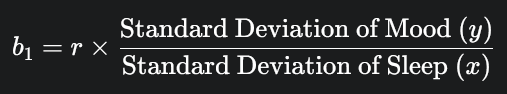
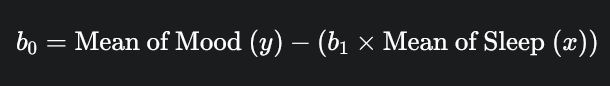

In [23]:
# Put it together: calculate the slope (b1) and intercept (b0)
b1 = r * (std_y / std_x)
b0 = mean_y - b1 * mean_x

# Show the variables you've just made
print(f"b1: {b1}")
print(f"b0: {b0}")

print(f"Regression Equation: ŷ = {b0} + {b1}x")
print(f"Slope (b1): {b1}")
print(f"Intercept (b0): {b0}")

b1: 1.0
b0: -3.0
Regression Equation: ŷ = -3.0 + 1.0x
Slope (b1): 1.0
Intercept (b0): -3.0


## Assessment questions:

**Question 5.1:** Determine the strength and direction of the relationship:

**Answer:** A positive value of 0.852 (close to 1) represents a Strong Positive association
    
**Question 5.2:** Determine if the correlation is significant (alpha = .05)

**Answer:** Significant

**Question:** What can you conclude about sleep and mood, based on the regression output?

**Answer**: The number of hours slept is a statistically **significant predictor** of mood the next day

**Question 5.3:** What is the predicted mood if a student sleeps 13 hours?

In [26]:
# Use the regression equation to predict mood for 13 hours of sleep (x=13)
x = 13
predicted_mood = b0 + b1 * x

print(f"Predicted Mood for 13 hours of sleep: {predicted_mood:.2f}")

Predicted Mood for 13 hours of sleep: 10.00


### Congrats on finishing Lab 4.1! Now onto 4.2...
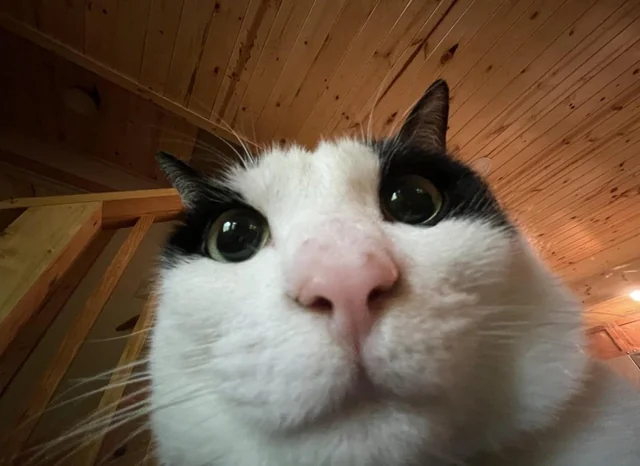